# Assignment CIE 5703 - week 6

#### Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

## Rotterdam rain gauge dataset 10 min data from 2003 - 2017

Read in data

In [2]:
data = pd.read_csv('Regen10Min344.txt',skipinitialspace=True)

Convert the dates to a readable format...

In [3]:
dates = data['Datum']
time = data['Tijd']
dates = dates.map(str)
date_split = dates.str.extract('(.{4})(.{2})(.{2})', expand=True)

time=time.apply(lambda x: '%04d' % x)
time_split = time.str.extract('(.{2})(.{2})', expand=True)

date_split.loc[:,3] = time_split.loc[:,0]
date_split.loc[:,4] = time_split.loc[:,1]

data.loc[:,'dt'] = pd.to_datetime(dict(year=date_split[0], month=date_split[1], day=date_split[2], hour=date_split[3], minute=date_split[4]))
data.index=data['dt']
data.head()

,Stn,Datum,Tijd,Dr10m,qDr10m,R10m,qR10m,WW,dt
dt,,,,,,,,,
2003-04-01 00:10:00,344,20030401,10,0.0,0,0.0,0,0,2003-04-01 00:10:00
2003-04-01 00:20:00,344,20030401,20,0.0,0,0.0,0,0,2003-04-01 00:20:00
2003-04-01 00:30:00,344,20030401,30,0.0,0,0.0,0,0,2003-04-01 00:30:00
2003-04-01 00:40:00,344,20030401,40,0.0,0,0.0,0,0,2003-04-01 00:40:00
2003-04-01 00:50:00,344,20030401,50,0.0,0,0.0,0,0,2003-04-01 00:50:00


Plot all data

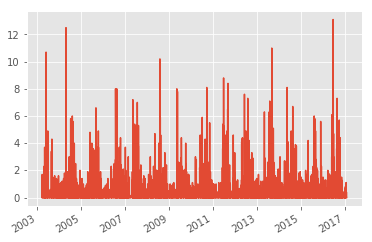

In [4]:
plt.plot(data['dt'], data["R10m"])
plt.gcf().autofmt_xdate()

Resample the 10 min dataset to hourly accumulated data

In [5]:
data_1h = pd.DataFrame()
data_1h['mean_rain'] = data.R10m.resample('H').mean()
data_1h['accum_rain'] = data.R10m.resample('H').sum()

In [6]:
data_1h.tail()

,mean_rain,accum_rain
dt,,
2017-01-31 20:00:00,0.0,0.0
2017-01-31 21:00:00,0.0,0.0
2017-01-31 22:00:00,0.0,0.0
2017-01-31 23:00:00,0.0,0.0
2017-02-01 00:00:00,0.0,0.0


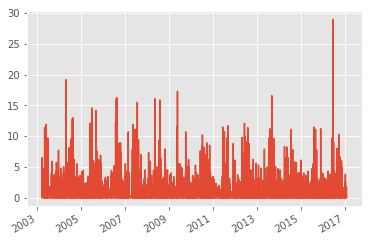

In [7]:
plt.plot(data_1h["accum_rain"])
plt.gcf().autofmt_xdate()

Resample 10 min dataset to 24 accumulated data

In [8]:
data_24h = pd.DataFrame()
data_24h['mean_rain'] = data.R10m.resample('D').mean()
data_24h['accum_rain'] = data.R10m.resample('D').sum()

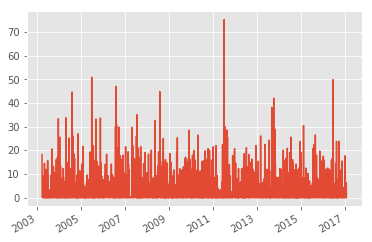

In [9]:
plt.plot(data_24h["accum_rain"])
plt.gcf().autofmt_xdate()

Select summer and winter months as separate datasets

In [10]:
data_summer_1h = data_1h.loc[(data_1h.index.month>=4) & (data_1h.index.month<=9)]

mask_start = (data_1h.index.month >= 1) & (data_1h.index.month <= 3)
mask_end = (data_1h.index.month >= 10) & (data_1h.index.month <= 12)
mask = mask_start | mask_end

data_winter_1h = data_1h.loc[mask]

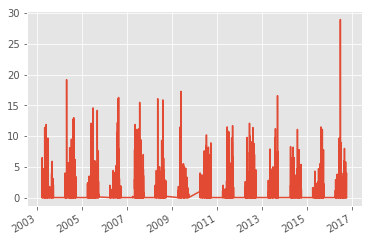

In [11]:
plt.plot(data_summer_1h["accum_rain"])
plt.gcf().autofmt_xdate()

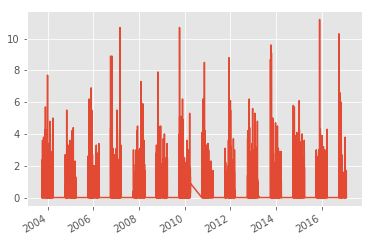

In [12]:
plt.plot(data_winter_1h["accum_rain"])
plt.gcf().autofmt_xdate()

Resample 10 min rain data to monthly accumulated data

In [13]:
data_monthly = pd.DataFrame()
data_monthly['mean_rain'] = data.R10m.resample('M').mean()
data_monthly['accum_rain'] = data.R10m.resample('M').sum()

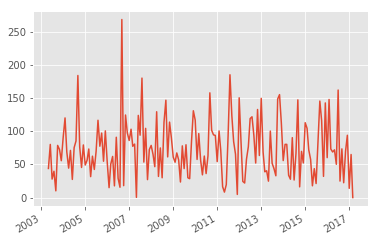

In [14]:
plt.plot(data_monthly["accum_rain"])
plt.gcf().autofmt_xdate()

## Answering the assignments

#### 1. General statistics for 24-hour and 10-min datasets: compute mean, standard deviation, skewness; plot histograms

##### 10 min dataset

In [15]:
print('Mean: %s' % str(data.R10m.mean()))
print('Std: %s' % str(data.R10m.std()))
print('Skew: %s' % str(data.R10m.skew()))

Mean: 0.0167705242334
Std: 0.124417798072
Skew: 27.7113892562


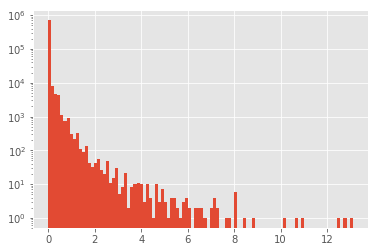

In [16]:
data.R10m.hist(bins = 100)
plt.gca().set_yscale("log")

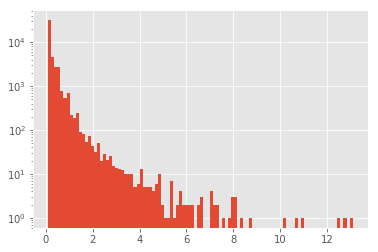

In [17]:
cur_data = data.R10m.loc[data.R10m>0]
hist_d = plt.hist(cur_data, bins=100)
plt.gca().set_yscale("log")

##### 24 h dataset

In [18]:
print('Mean: %s' % str(data_24h.accum_rain.mean()))
print('Std: %s' % str(data_24h.accum_rain.std()))
print('Skew: %s' % str(data_24h.accum_rain.skew()))

Mean: 2.4144778481
Std: 4.88485821764
Skew: 3.89488394203


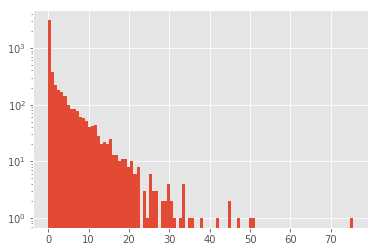

In [19]:
data_24h.accum_rain.hist(bins = 100)
plt.gca().set_yscale("log")

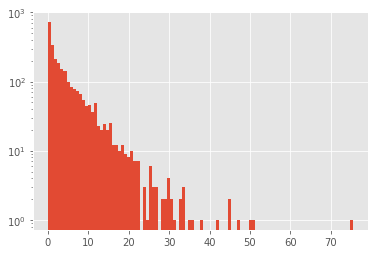

In [20]:
cur_data = data_24h.accum_rain.loc[data_24h.accum_rain>0]
hist_d = plt.hist(cur_data, bins=100)
plt.gca().set_yscale("log")

In [21]:
selected_monthly_data = data_monthly[(data_monthly.index >= '2004-01-01')]
selected_monthly_data.tail()

,mean_rain,accum_rain
dt,,
2016-10-31,0.015636,69.8
2016-11-30,0.021713,93.8
2016-12-31,0.003114,13.9
2017-01-31,0.014516,64.8
2017-02-28,0.000000,0.0


### 2. a. Analysis of seasonal cycles: create boxplots for monthly totals across all year

Merge all monthly data across all years

In [22]:
monthly_rain = pd.DataFrame()
for i in range(0,12,1):
    cur_data = selected_monthly_data.iloc[i::12,:]
    cur_data.index = range(0, len(cur_data))
    cur_rain = cur_data.accum_rain
    rain_per_month = pd.DataFrame(cur_rain)
    monthly_rain['%d' % i] = rain_per_month
monthly_rain.tail()

,0,1,2,3,4,5,6,7,8,9,10,11
9,68.5,38.8,40.3,24.7,100.1,51.6,43.5,32.8,148.3,155.0,112.2,55.7
10,80.1,80.1,33.5,27.6,90.2,26.4,66.5,147.1,16.1,69.5,52.1,112.7
11,104.3,71.8,57.3,17.7,43.5,21.1,83.1,145.3,115.8,31.9,142.5,60.1
12,147.7,73.1,68.6,71.8,50.1,161.9,24.8,73.3,22.3,69.8,93.8,13.9
13,64.8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Boxplot

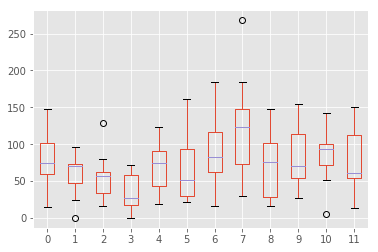

In [23]:
monthly_rain.plot.box()

### 2. b. Analysis of diurnal cycles: create boxplots for hourly totals for entire dataseries

Merge hourly data across all years

In [24]:
hourly_rain = pd.DataFrame()
for i in range(0,24,1):
    cur_data = data_1h.iloc[i::24, :]
    cur_data.index = range(0, len(cur_data))
    cur_rain = cur_data.accum_rain
    rain_per_day = pd.DataFrame(cur_rain)
    hourly_rain['%d' % i] = rain_per_day
hourly_rain.tail()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
5051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5052,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,1.2,0.6
5053,0.7,0.4,0.6,1.7,1.1,0.9,0.5,0.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5055,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


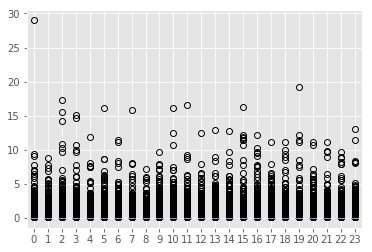

In [25]:
hourly_rain.plot.box()

### 2. c. Variation of diurnal cycles with seasons: create boxplots for hourly totals for summer season (April – September) and for winter season (October-March)

Merge hourly summer data across all years

In [26]:
hourly_rain_summer = pd.DataFrame()
for i in range(0,24,1):
    cur_data = data_summer_1h.iloc[i::24, :]
    cur_data.index = range(0, len(cur_data))
    cur_rain = cur_data.accum_rain
    rain_per_day = pd.DataFrame(cur_rain)
    #rain_per_day = rain_per_day.replace(0, np.nan)
    hourly_rain_summer['%d' % i] = rain_per_day
hourly_rain_summer.tail()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
2557,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4
2559,0.5,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.6,4.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


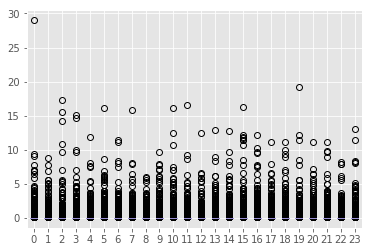

In [27]:
hourly_rain_summer.plot.box()

Repeat with winter

In [28]:
hourly_rain_winter = pd.DataFrame()
for i in range(0,24,1):
    cur_data = data_1h.iloc[i::24, :]
    cur_data.index = range(0, len(cur_data))
    cur_rain = cur_data.accum_rain
    rain_per_day = pd.DataFrame(cur_rain)
    #rain_per_day = rain_per_day.replace(0, np.nan)
    hourly_rain_winter['%d' % i] = rain_per_day
hourly_rain_winter.tail()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
5051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5052,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,1.2,0.6
5053,0.7,0.4,0.6,1.7,1.1,0.9,0.5,0.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5055,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


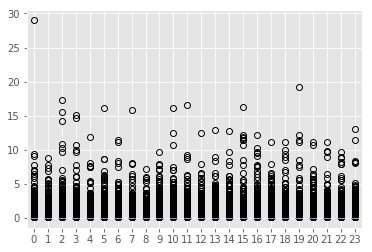

In [29]:
hourly_rain_winter.plot.box()

### 2. d. Diurnal cycles of intense storm events: Count nr of exceedances above 10 mm/h threshold for each hour of the day, for entire data series and for summer months only

Show rainfall events > 10mm /h over entire 1h accumulated dataset

In [30]:
print(data_1h.accum_rain[data_1h.accum_rain>10])

dt
2003-05-11 23:00:00    11.4
2003-06-04 15:00:00    11.9
2004-04-30 19:00:00    19.2
2004-08-13 14:00:00    12.8
2004-08-24 23:00:00    13.0
2005-06-03 16:00:00    12.1
2005-07-04 03:00:00    14.6
2005-09-10 02:00:00    14.2
2006-08-01 19:00:00    12.2
2006-08-03 15:00:00    10.7
2006-08-12 10:00:00    12.5
2006-08-14 10:00:00    16.1
2006-08-21 15:00:00    16.3
2007-03-01 03:00:00    10.7
2007-05-16 04:00:00    11.9
2007-06-14 18:00:00    11.1
2007-07-16 17:00:00    11.2
2007-07-29 02:00:00    15.5
2008-05-16 05:00:00    16.1
2008-08-07 07:00:00    15.9
2008-08-07 12:00:00    12.5
2008-08-07 13:00:00    12.9
2009-05-15 15:00:00    11.5
2009-05-26 02:00:00    17.3
2009-10-09 20:00:00    10.7
2010-07-14 16:00:00    10.2
2011-06-16 06:00:00    11.5
2011-07-01 02:00:00    10.8
2011-07-14 10:00:00    10.7
2011-09-11 15:00:00    11.7
2012-06-11 15:00:00    12.1
2012-08-05 15:00:00    11.4
2013-08-05 21:00:00    11.2
2013-09-08 11:00:00    16.6
2014-07-28 06:00:00    11.1
2015-08-13 19:00:

Amount of events 

In [31]:
print(len(data_1h.accum_rain[data_1h.accum_rain>10]))

41


Events in summer

In [32]:
print(data_summer_1h.accum_rain[data_summer_1h.accum_rain>10])

dt
2003-05-11 23:00:00    11.4
2003-06-04 15:00:00    11.9
2004-04-30 19:00:00    19.2
2004-08-13 14:00:00    12.8
2004-08-24 23:00:00    13.0
2005-06-03 16:00:00    12.1
2005-07-04 03:00:00    14.6
2005-09-10 02:00:00    14.2
2006-08-01 19:00:00    12.2
2006-08-03 15:00:00    10.7
2006-08-12 10:00:00    12.5
2006-08-14 10:00:00    16.1
2006-08-21 15:00:00    16.3
2007-05-16 04:00:00    11.9
2007-06-14 18:00:00    11.1
2007-07-16 17:00:00    11.2
2007-07-29 02:00:00    15.5
2008-05-16 05:00:00    16.1
2008-08-07 07:00:00    15.9
2008-08-07 12:00:00    12.5
2008-08-07 13:00:00    12.9
2009-05-15 15:00:00    11.5
2009-05-26 02:00:00    17.3
2010-07-14 16:00:00    10.2
2011-06-16 06:00:00    11.5
2011-07-01 02:00:00    10.8
2011-07-14 10:00:00    10.7
2011-09-11 15:00:00    11.7
2012-06-11 15:00:00    12.1
2012-08-05 15:00:00    11.4
2013-08-05 21:00:00    11.2
2013-09-08 11:00:00    16.6
2014-07-28 06:00:00    11.1
2015-08-13 19:00:00    11.5
2015-09-04 20:00:00    11.1
2016-06-23 00:00:

Amount of events

In [33]:
print(len(data_summer_1h.accum_rain[data_summer_1h.accum_rain>10]))

37
